In [1]:
# $export MPLBACKEND=Agg
import matplotlib
matplotlib.use('Agg') 
%pylab inline
import os

import matplotlib.pyplot as plt

import numpy as np
import gc
import pandas
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [14]:
imagewidth = 40
def display(image, min = 0.0, max = 1.0):
    plt.imshow(image, cmap = plt.get_cmap('gray'), interpolation='nearest')
    plt.show()
    

def load_data(path):
    print("loading...")
    gc.collect() # collect garbage
    data = pandas.read_hdf(path, '/df')
    df = pandas.DataFrame(data)
    data_dict = {}
    for label in set(df._get_numeric_data().columns).union({'hcad'}):
        # union hcad to ensure that hcad col comes in even if not considered numerical
        # if label != 'hcad':
        data_dict[label] = df[label].astype(float)
        # df[label][df[label] > 1] = 1.0

    # df['hcad'] = df['hcad'].astype(float)
    result = pandas.DataFrame.from_dict(data_dict)

    result = result.replace([np.inf, -np.inf], 1)
    
    return result.sort(['hcad']).fillna(0)

from collections import defaultdict

META = load_data("../Dropbox/data_for_brian/meta/df_meta.hd")

def old_fast_show_ratio_plot(xy_points, y_data, log = False, normalize_buckets=True):
    if log:
        y_data = np.log(y_data)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(3,3)
    plt.hist(y_data)
    plt.show()

    buckets = defaultdict(list)
    resolution = 150
    x = np.array(xy_points['x'])
    y = np.array(xy_points['y'])
    H, xedges, yedges = numpy.histogram2d(x,y, bins=resolution, weights = y_data)
    H_nums, dummy2, dummy1 = numpy.histogram2d(x,y, bins=resolution)
    plt.show()
    fig = plt.figure(frameon=False)
    fig.set_size_inches(12,12)
    if normalize_buckets:
        H=H/H_nums
        
    H[H_nums == 0.0] = numpy.nan
#     if log:
#         H = np.log(H)


    plt.imshow(H,
               interpolation='nearest', vmin = 0, vmax = 1)
    plt.colorbar()
    plt.show()
    return np.nan_to_num(H)


def plot_on_map(pddf, normalize_buckets = True,
                xy_df =  pandas.DataFrame.from_dict({'x': -META['pointx'],'y': META['pointy']})):
    for col in pddf.columns:
        print("\n\n\n",col)
        xy = xy_df
        print("linear plot")
        old_fast_show_ratio_plot(xy,np.array(pddf[col]), normalize_buckets = normalize_buckets)
#         print("log plot")
#         old_fast_show_ratio_plot(xy,np.array(pddf[col]), log = True)
#         colored_scatter(xy,np.array(pddf[col]))


def norm(col):
    result = (col - np.min(col))
    return result / max(.01, np.max(result))

loading...
Opening ../Dropbox/data_for_brian/meta/df_meta.hd in read-only mode


In [3]:
print META.columns

Index([u'hcad', u'img0', u'img1', u'lat', u'lon', u'pointx', u'pointy'], dtype='object')


In [ ]:
mat = np.zeros([870476, 256])
for i in range(88):
    piece = np.load("./final_model_inputs/compressed_terrain_"+str(i)+".npy")
    mat[i*10000: i*10000 + len(piece)] = piece
    

In [11]:
print mat.shape

(870476, 256)


In [12]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn import metrics

# # for i in range(2,1000):
# kmeans = KMeans(init='k-means++', n_clusters = 3)
# kmeans.fit(mat)



In [13]:

# a = kmeans.labels_
# b = np.zeros((a.size, a.max()+1))
# b[np.arange(len(mat)), a] = 1
# print b
# print b.shape

In [14]:
# print set(a)
# plot_on_map(pandas.DataFrame.from_dict({"x":kmeans.labels_ == 0}))
# plot_on_map(pandas.DataFrame.from_dict({"x":kmeans.labels_ == 1}))
# plot_on_map(pandas.DataFrame.from_dict({"x":kmeans.labels_ == 2}))

In [6]:
hcad = load_data("../Dropbox/data_for_brian/hcad_features/hcad_df_200.hd")
wind_data = load_data("../Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist8x8.mat.hd")
y_data = load_data("../Dropbox/data_for_brian/y_df.hd")

loading...
Opening ../Dropbox/data_for_brian/hcad_features/hcad_df_200.hd in read-only mode
loading...
Opening ../Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist8x8.mat.hd in read-only mode
loading...
Opening ../Dropbox/data_for_brian/y_df.hd in read-only mode


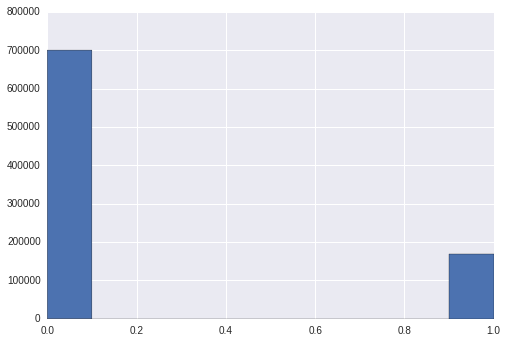

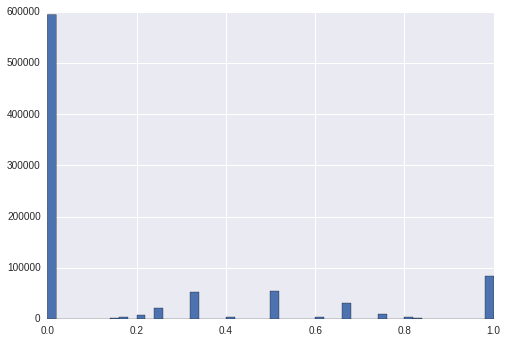

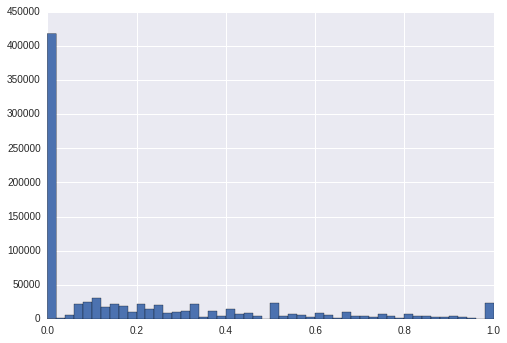

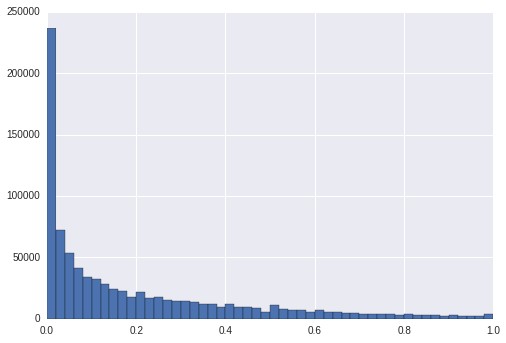

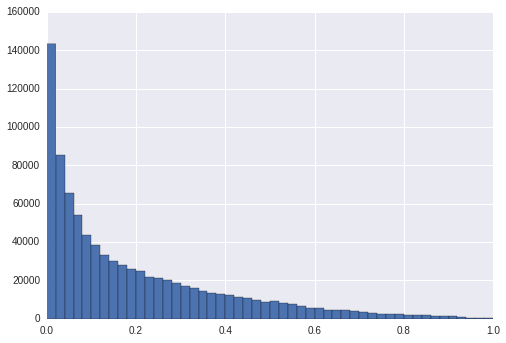

In [7]:
plt.hist(y_data['y'])
plt.show()
plt.hist(y_data['y100_mean'], bins =50)
plt.show()
plt.hist(y_data['y200_mean'], bins =50)
plt.show()
plt.hist(y_data['y400_mean'], bins =50)
plt.show()
plt.hist(y_data['y1000_mean'], bins =50)
plt.show()

In [36]:
# print wind_data.columns
# speed_names = [
#     u'intp_spd0',
#     u'intp_spd1',
#     u'intp_spd2',
#     u'intp_spd3',
#     u'intp_spd4',
#     u'intp_spd5',
#     u'intp_spd6',
#     u'intp_spd7',
#     u'intp_spd8',
#     u'intp_spd9',

# ]
# wind_maxes = np.array(wind_data[speed_names].max(axis=1)).reshape(-1, 1)
# print wind_maxes

In [37]:
# load hidden layer acitvations of hcad data
# hcad_1d = np.load("./gitignored/autoencoder_hidden_activations.npy")
# print hcad_1d
# print np.max(hcad_1d), np.min(hcad_1d)

In [8]:

mat = mat / np.max(mat)
# print np.array(wind_data.shape)
y_data = np.array(y_data['y400_mean']).astype(np.float32)
x_data = np.concatenate ((
                      np.array(mat).astype(np.float32),
                      #np.array(wind_data),
                      #hcad,
                      #np.array([META['lat'], META['lon']]).T
                     ), 
                         axis = 1)

x_data = x_data.astype(np.float32)

for col in range(len(x_data[0])):
    x_data[:, col] = norm(x_data[:, col])





In [9]:
del(hcad)
del(wind_data)
del(mat)

In [10]:
y_data_categorical = (y_data > 0).astype(int32)
y_data_categorical = np.eye(2)[y_data_categorical].reshape(-1,2)

In [11]:
y_data = np.array([y_data]).T


print y_data
print np.mean(y_data[:,0])
print x_data.shape

[[ 0.2       ]
 [ 0.        ]
 [ 0.2       ]
 ..., 
 [ 0.        ]
 [ 0.32432431]
 [ 0.35897437]]
0.195363
(870476, 256)


In [12]:

# positive = np.where(trY[:,0] != 1)[0]#[data[:,column_names.index("match")] != 1]
# negative = np.where(trY[:,0] == 1)[0]#[data[:,column_names.index("match")] != 1]
# print positive
# print negative
# print len(positive), len(negative)
# extra_pos_x = [] #_positive.append(random.choice(positive))
# extra_pos_y = []

# import random
# while len(extra_pos_x) + len(positive) < len(negative):
#     index = random.choice(positive)
#     extra_pos_x.append(trX[index])

#     extra_pos_y.append(trY[index])
    
# positive_x = np.array(extra_pos_x)
# positive_y = np.array(extra_pos_y)
# print positive_x
# print positive_y
# trX = np.concatenate((trX, positive_x), axis = 0)
# trY = np.concatenate((trY, positive_y), axis = 0)
# del(positive)
# del(negative)
# del(extra_pos_x)
# del(extra_pos_y)
# # np.random.shuffle(data)

('\n\n\n', 'x')
linear plot


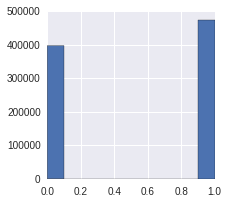

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


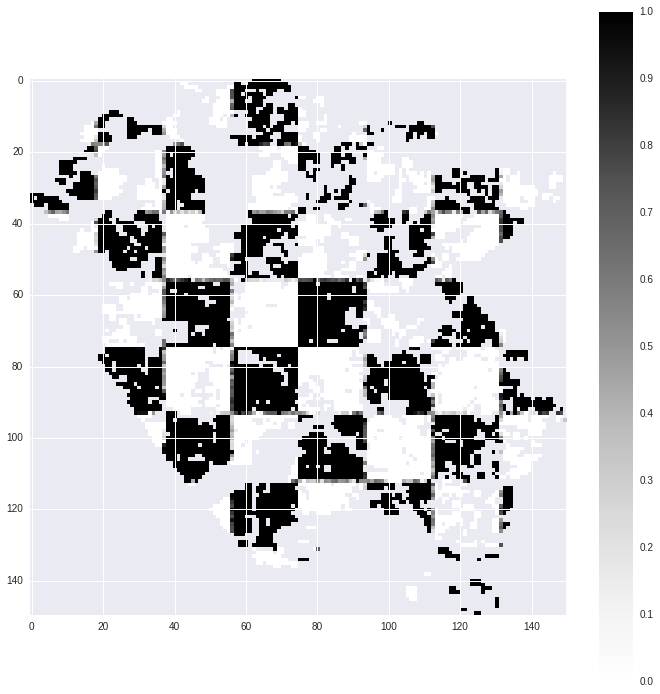

0.543259090429


In [15]:
checker_size = 4.0
x_range = max(META['pointx']) - min(META['pointx'])
y_range = max(META['pointy']) - min(META['pointy'])
train_indices = np.logical_xor((np.mod((META['pointx'] - min(META['pointx'])), x_range/checker_size) < x_range/(2*checker_size)),
                       (np.mod((META['pointy'] - min(META['pointy'])), y_range/checker_size) > y_range/(2*checker_size)))
plot_on_map(pandas.DataFrame({'x': train_indices}))
print (np.mean(train_indices))

In [16]:
# indices = np.array(range(len(x_data)))
# np.random.shuffle(indices)
# test_indices = indices[:len(indices)/2]
# train_indices = indices[len(indices)/2:]
# trX = x_data[train_indices]
# trY = y_data[train_indices]
# teX = x_data[test_indices]
# teY = y_data[test_indices]
# print train_indices.shape


trX = x_data[np.where(train_indices==1)]

trY = y_data[np.where(train_indices==1)]
teX = x_data[np.where(train_indices==0)]
teY = y_data[np.where(train_indices==0)]



In [45]:
# trX = x_data
# trY = y_data_categorical
# print y_data_categorical.shape

In [21]:
weight_variables = []
def stack(input_mat, num_neurons, nonlinearity):
    weights = tf.Variable(tf.random_normal([int(input_mat.get_shape()[1]), num_neurons], stddev=0.35))
    weight_variables.append(weights)
    biases = tf.Variable(tf.random_normal([num_neurons], stddev=0.35))
    return nonlinearity(tf.add(tf.matmul(input_mat, weights), biases))

import tensorflow as tf

training_epochs = 1000
batch_size = 12800
n_output = 1

x = tf.placeholder("float", [None, trX.shape[1]])
y = tf.placeholder("float", [None, n_output])

network_ouput = x
# network_ouput = stack(network_ouput, 100, tf.nn.relu)
network_ouput = stack(network_ouput, 50, tf.nn.relu)
network_ouput = stack(network_ouput, 50, tf.nn.relu)
# network_ouput = stack(network_ouput, 100, tf.nn.relu)
network_ouput = stack(network_ouput, n_output, tf.nn.sigmoid)


pred = network_ouput
cost = tf.reduce_mean(tf.square(pred - (y *.9+.05))) 

for matrix in weight_variables:
    cost += .0001*tf.nn.l2_loss(matrix)

# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=.001).minimize(cost)

init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

train_loss_record = []
valid_loss_record = []

#         print "    Accuracy:", sess.run(accuracy, feed_dict = {x: trX, y: trY})

Epoch: 0001 cost= 0.143359346


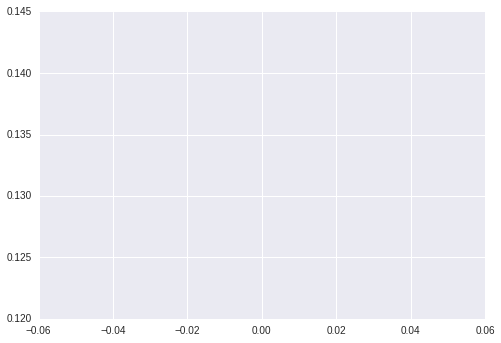

predictions


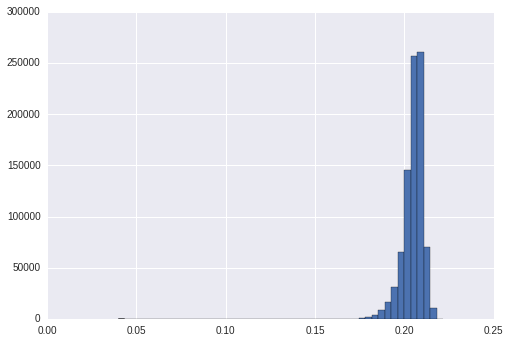

test Y data


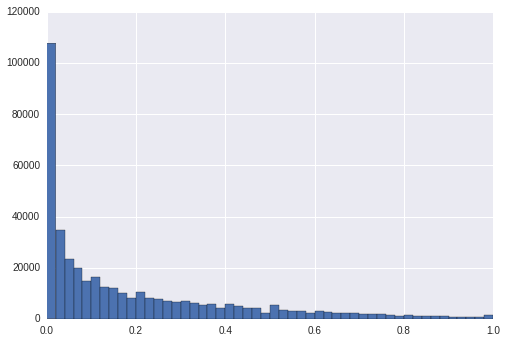

Epoch: 0011 cost= 0.069283557
Epoch: 0021 cost= 0.054310091
Epoch: 0031 cost= 0.050785037
Epoch: 0041 cost= 0.049755528
Epoch: 0051 cost= 0.049367490


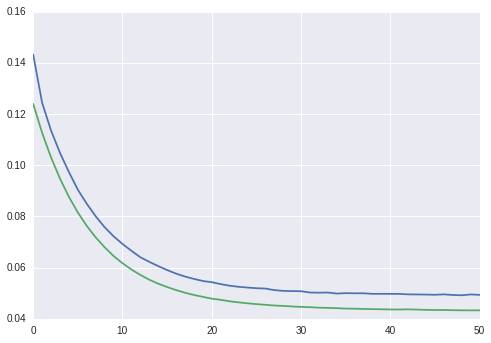

predictions


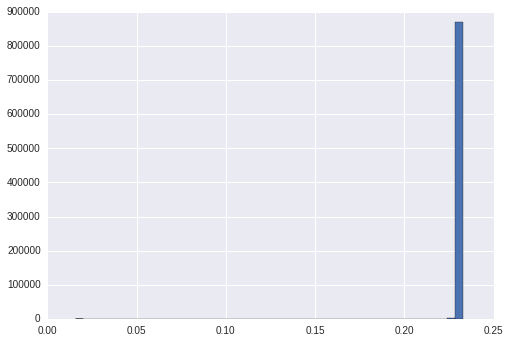

test Y data


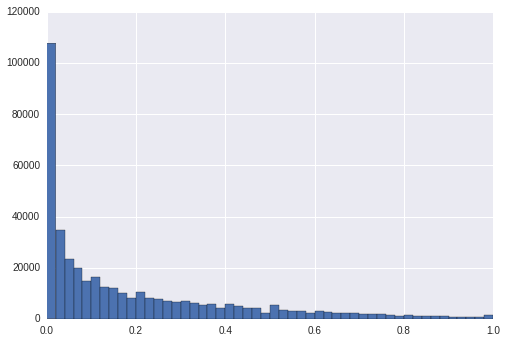

Epoch: 0061 cost= 0.049100497


KeyboardInterrupt: 

In [22]:
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(len(trX)/batch_size)
    # Loop over all batches
    for start, end in zip(range(0, len(trX), batch_size), range(batch_size, len(trX), batch_size)):
        indices = np.random.randint(len(trX), size=batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: trX[indices],
                                                      y: trY[indices]})
        # Compute average loss
        avg_cost += c / total_batch
#     Display logs per epoch step
    train_loss_record.append(avg_cost)
    valid_loss_record.append(sess.run(cost, feed_dict={x: teX, y: teY}))
    if epoch % 10 == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost)

    if epoch % 50 == 0:
        
        plt.plot(xrange(len(train_loss_record)), train_loss_record)
        plt.plot(xrange(len(valid_loss_record)), valid_loss_record)
        plt.show()
        predictions = sess.run(pred, feed_dict = {x : x_data})[:,0]
        predictions[predictions < 0]=0
        predictions[predictions > 1]=1
        
        print "predictions"
        plt.hist(predictions, bins = 50)
        plt.show()

        print "test Y data"
        plt.hist(teY[:,0], bins = 50)
        plt.show()

In [ ]:
# p_damage = tf.nn.softmax(pred)
plt.plot(xrange(len(loss_record)), loss_record)
plt.show()
predictions = sess.run(pred, feed_dict = {x : x_data})[:,0]
predictions[predictions < 0]=0
predictions[predictions > 1]=1

plt.hist(predictions, bins = 50)
plt.show()

plt.hist(teY[:,0], bins = 50)
plt.show()



In [ ]:
print predictions
plot_on_map(pandas.DataFrame.from_dict({"x": norm(y_data[:,0])}))
plot_on_map(pandas.DataFrame.from_dict({"x": predictions}))


# hcad = load_data("../Dropbox/data_for_brian/hcad_features/hcad_df_200.hd")
# print hcad.columns
# plot_on_map(pandas.DataFrame.from_dict({"x":hcad[u'mean_bld_val']}))


In [ ]:
sns.jointplot(x=y_data[:,0], y=predictions, kind = 'hex', color="k")
plt.show()